In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
purchases = pd.read_csv('train_purchases.csv')
sessions = pd.read_csv('train_sessions.csv')
features = pd.read_csv('item_features.csv')

In [3]:
features_ones = features.copy()
features_ones["feature_value_id"]=1
features_ones = features_ones.dropna()
features_ones = features_ones.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')
features_ones = features_ones.replace(np.nan, 0)
features_matrix = features.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')

features_ones.head(10)

feature_category_id,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
item_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


for components = 2
[0.4636]
for components = 3
[0.5792]
for components = 4
[0.6587]
for components = 5
[0.7194]
for components = 6
[0.7622]
for components = 7
[0.7902]
for components = 8
[0.817]
for components = 9
[0.84]
for components = 10
[0.8581]
for components = 11
[0.8752]
for components = 12
[0.8888]
for components = 13
[0.9022]
for components = 14
[0.9149]
for components = 15
[0.9264]
for components = 16
[0.9371]
for components = 17
[0.9462]
for components = 18
[0.9539]
for components = 19
[0.9614]


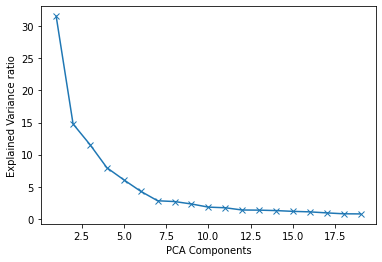

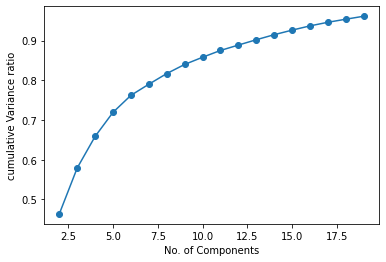

In [4]:
import matplotlib.pyplot as plt

#Running PCA on the scaled data

from sklearn.decomposition import PCA
plt.figure()
cmr=[]
for n_com in range(2,20):
    
    cumulative_ratio=0
   
    pca= PCA(n_components=n_com)
    hobbies_reduced=pca.fit_transform(features_ones)

    print("for components = %d" %n_com)
    components= pd.DataFrame(np.round(pca.components_, 4),columns=features_ones.keys())
   
    ratios=pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    
    for i in range((variance_ratios.shape[0])):
        
        cumulative_ratio= cumulative_ratio + variance_ratios.values[i]
    
    cmr.append(cumulative_ratio)
    print(cumulative_ratio)
vr= variance_ratios.values
plt.plot(range(1,20),vr*100,marker="x")   
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance ratio")
plt.figure()
plt.plot(range(2,20),cmr,marker="o")
plt.xlabel("No. of Components")
plt.ylabel("cumulative Variance ratio")
plt.show()
